# N-gram Model

### José Pablo Kiesling Lange

In [2]:
import re
from collections import Counter
from collections import defaultdict
import math

import matplotlib.pyplot as plt

import nltk
from nltk import bigrams
from nltk.corpus import cess_esp

In [3]:
nltk.download('cess_esp')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\TheKi\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TheKi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\TheKi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
corpus_nltk = cess_esp.words()

## Estandarización

Para ver la efectivdad de la estandarización, se mostrará las 10 palabras más frecuentes del corpus antes y después de la estandarización. El objetivo es ver si hay modificación en la cantidad de dichas palabras o si una nueva palabra aparece con frecuencia.

In [5]:
def get_most_common_words(corpus, n=10):
    words = [word for line in corpus for word in line.split()]
    most_common = Counter(words).most_common(n)
    return most_common

In [6]:
most_common_words = get_most_common_words(corpus_nltk, n=10)
most_common_words

[(',', 11420),
 ('de', 10234),
 ('la', 6412),
 ('.', 5866),
 ('que', 5552),
 ('el', 5199),
 ('en', 4340),
 ('y', 4235),
 ('*0*', 3883),
 ('"', 3038)]

Además se mostrará los primeros 25 tokens del corpus antes y después de la estandarización.

In [7]:
corpus_nltk[:25]

['El',
 'grupo',
 'estatal',
 'Electricité_de_France',
 '-Fpa-',
 'EDF',
 '-Fpt-',
 'anunció',
 'hoy',
 ',',
 'jueves',
 ',',
 'la',
 'compra',
 'del',
 '51_por_ciento',
 'de',
 'la',
 'empresa',
 'mexicana',
 'Electricidad_Águila_de_Altamira',
 '-Fpa-',
 'EAA',
 '-Fpt-',
 ',']

Como se puede apreciar, hay palabras que tienen `_` en los tokens y separan palabras. Por lo que se harán las funciones específicas para limpiar los tokens y separar las palabras.

In [8]:
def replace_whitespaces(word):
    return "".join(re.sub('_', ' ', word))

In [9]:
def separate_words(word):
    return word.split()

In [10]:
corpus = []

In [11]:
corpus_without_underscore = [replace_whitespaces(word) for word in corpus_nltk]

In [12]:
for word in corpus_without_underscore:
    if len(word.split()) > 1:
        corpus.extend(separate_words(word))
    else:
        corpus.append(word)

Además, se puede ver que hay tokens que empiezan con caracteres no alfanuméricos o que contienen caracteres especiales. Específicamente, los siguientes

In [13]:
set(word for word in corpus if not word.isalnum())

{'!',
 '"',
 '"Guga"',
 '"Steel"',
 '"añicos',
 '%',
 '&',
 '&amp',
 "'",
 "'Arteaga'",
 "'Catanha'",
 "'Erika'",
 "'Guti'",
 "'hooligans'",
 "'matarte'",
 "'savoir",
 "'síndrome",
 '*',
 '*0*',
 '+',
 ',',
 ',obligado',
 '-',
 '-Fpa-',
 '-Fpt-',
 '-LSB-',
 '-fe-',
 '-fpa-',
 '-fpt-',
 '.',
 '...',
 '.264',
 '/',
 "0'5",
 '0,242',
 '0,35',
 '0,5',
 '0,6',
 '0,7',
 '0,77',
 '0,92',
 '0,9349',
 '0,9355',
 '0,9452',
 '0,95',
 '0,9515',
 '0,9554',
 '0-0',
 '0-1',
 '0-1,',
 '0-2',
 '0-3',
 '0.',
 '0.-Athletic',
 '04/20/00-16/00',
 '04/20/04-05/00',
 '04/20/04-08/00',
 '06.00',
 '07.00',
 '07.15',
 '07.28.27',
 '07.30.42',
 '08.00',
 '09.25',
 '09.30',
 '1,04%',
 '1,08',
 '1,1',
 '1,15',
 '1,18',
 '1,26',
 '1,28',
 '1,3',
 '1,32',
 '1,5',
 '1,7',
 '1,75',
 '1,8',
 '1,9',
 '1,96',
 '1-0',
 '1-0.',
 '1-1',
 '1-2',
 '1-3',
 '1-4',
 '1-6',
 '1.',
 '1.000',
 '1.008.000',
 '1.044',
 '1.115.856',
 '1.181',
 '1.200',
 '1.223.112',
 '1.226',
 '1.298',
 '1.300',
 '1.324.000',
 '1.365',
 '1.420',
 '1.5

Como se puede ver, hay palabras que tienen `'`o `"` en los tokens por lo que *solo* se eliminarán esos caracteres y no el resto del token. En los otros casos, no representan alguna palabra, por lo que se eliminarán completamente.

In [14]:
def clean_word(word):
    if re.search(r'[^a-zA-Z0-9\'"áéíóúÁÉÍÓÚ]', word):
        return ""
    
    return re.sub(r'[^a-zA-Z0-9áéíóúÁÉÍÓÚ]', '', word)

In [15]:
corpus = [clean_word(word) for word in corpus]

In [16]:
corpus = [word for word in corpus if clean_word(word) != '']

Finalmente, se pondrán las palabras en minúsculas solo si no es sigla o acrónimo. Para esto, se hará una función que verifique si la palabra está en mayúsculas y si no es así, la pondrá en minúsculas.

In [17]:
def case_folding(corpus):
    return [word.lower() if not word.isupper() else word for word in corpus]

In [18]:
corpus = case_folding(corpus)

In [19]:
most_common_words = get_most_common_words(corpus, n=10)
most_common_words

[('de', 11828),
 ('la', 7150),
 ('el', 6079),
 ('que', 5943),
 ('en', 4991),
 ('y', 4318),
 ('a', 3493),
 ('los', 3229),
 ('del', 2514),
 ('las', 1956)]

In [20]:
corpus[:25]

['el',
 'grupo',
 'estatal',
 'electricité',
 'de',
 'france',
 'EDF',
 'anunció',
 'hoy',
 'jueves',
 'la',
 'compra',
 'del',
 '51',
 'por',
 'ciento',
 'de',
 'la',
 'empresa',
 'mexicana',
 'electricidad',
 'águila',
 'de',
 'altamira',
 'EAA']

Como se puede apreciar, ya solo hay palabras alfanuméricas y con acentos. Y todas están separadas como se debe

## Model 2-gram based

La implementación del modelo se hizo en base a la implementación de [geeksforgeeks](https://www.geeksforgeeks.org/nlp/n-gram-language-modelling-with-nltk/).

In [21]:
words = nltk.word_tokenize(' '.join(corpus), language='spanish')

In [22]:
bi_grams = list(bigrams(words))

In [23]:
model = defaultdict(lambda: defaultdict(lambda: 0))

Contar ocurrencias para frecuencia relativa

In [24]:
for w1, w2 in bi_grams:
    model[w1][w2] += 1

In [25]:
for w1_w2 in model:
    total = sum(model[w1_w2].values())
    for w2 in model[w1_w2]:
        model[w1_w2][w2] /= total

In [26]:
model['de']['la']

0.1439803855258708

la probabilidad de que la palabra `la` (segunda más frecuente en el corpus) siga a la palabra `de` (la más frecuente en el corpus) es de 0.14

In [27]:
def predict_next_words(w1, length):
    prediction = [w1]
    for _ in range(length):
        next_word = model[prediction[-1]]
        if next_word:
            prediction.append(max(next_word, key=next_word.get))
            
    return prediction

In [28]:
predict_next_words('de', 5)

['de', 'la', 'que', 'se', 'ha', 'sido']

## Preplejidad

In [29]:
def calculate_perplexity(sentence, model, vocab, alpha=1.0):
    words = nltk.word_tokenize(sentence, language='spanish')
    n = len(words)
    V = len(vocab)
    
    log_prob_sum = 0.0
    
    for i in range(1, n):
        w1 = words[i - 1]
        w2 = words[i]
        
        prob = (model[w1].get(w2, 0)) / (sum(model[w1].values()))
        
        log_prob_sum += math.log2(prob)
    
    perplexity = 2 ** (-log_prob_sum / (n - 1))
    return perplexity


In [30]:
calculate_perplexity('de la casa', model, set(corpus))

59.55762035009728

## Corpus length variation

In [31]:
def get_corpus_length_variation(corpus, percentage):
    length = int(percentage * len(corpus))
    return corpus[:length]

In [32]:
sizes = [0.01, 0.05, 0.1, 0.5, 1.0]

In [33]:
sentence = 'de la casa'

In [34]:
perplexities = {}

In [35]:
for size in sizes:
    corpus_variation = get_corpus_length_variation(corpus, size)
    perplexities[size] = calculate_perplexity(sentence, model, set(corpus_variation))

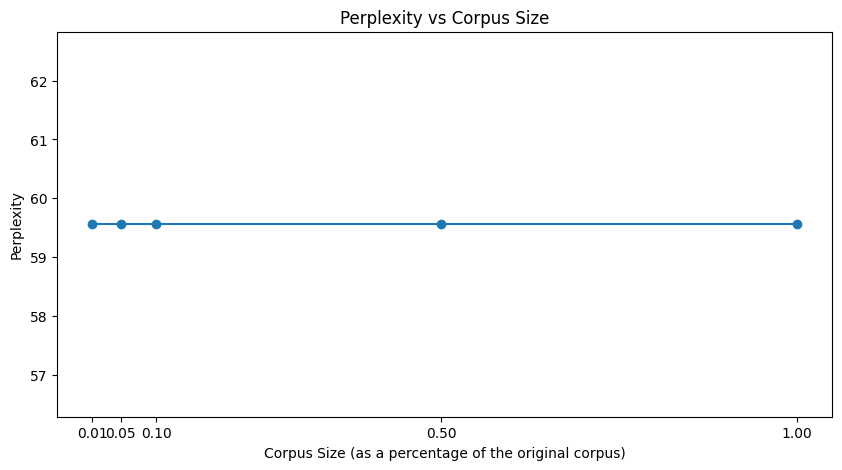

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sizes, list(perplexities.values()), marker='o')
plt.title('Perplexity vs Corpus Size')
plt.xlabel('Corpus Size (as a percentage of the original corpus)')
plt.ylabel('Perplexity')
plt.xticks(sizes)
plt.show()